    $ ll
    total 380
    -rw-r--r-- 1 mluo 197121  50542 Oct  9 16:36 02_CSV_stock_returns_1931_2002.csv
    -rw-r--r-- 1 mluo 197121  12662 Oct  9 16:34 02_CSV_xm101stu.csv
    -rw-r--r-- 1 mluo 197121 312615 Oct  7 15:43 02_TOPIX86修正.xlsx
    
    $ head 02_CSV_xm101stu.csv
    fem,fgpa,sata,satm,satv
    1,2.518,4,4,4
    0,2.326,4,4.9,3.1
    1,3.003,4.2,4.4,4
    0,2.111,4.4,4.9,3.9
    0,2.145,4.5,4.3,4.7
    1,1.917,4.6,5.1,4.1
    0,2.725,4.7,4.9,4.5
    1,3.364,4.75,4.9,4.6
    1,2.472,4.75,4.4,5.1

In [22]:
from pandas import Series, DataFrame
import pandas as pd

df = pd.read_csv('02_CSV_xm101stu.csv')  # print type(df)
df.head(n=5)

,fem,fgpa,sata,satm,satv
0,1,2.518,4.0,4.0,4.0
1,0,2.326,4.0,4.9,3.1
2,1,3.003,4.2,4.4,4.0
3,0,2.111,4.4,4.9,3.9
4,0,2.145,4.5,4.3,4.7


In [23]:
# print df.head(n=5).fgpa
# print df.head(n=5).satv
# print df.head(n=5).sum()
# print df.head(n=5).sum(axis=1)
#df.head(n=5).describe().T

In [24]:
dfsum=df.quantile([.90, .95, .99, .999]).T
dfsum['skew']=df.skew()
dfsum['kurt']=df.kurt()
dfsum['mad'] =df.mad()
print dfsum

         0.9    0.95     0.99     0.999      skew      kurt       mad
fem   1.0000  1.0000  1.00000  1.000000  0.462894 -1.791623  0.474697
fgpa  3.4318  3.6142  3.80244  3.957016  0.168243 -0.483604  0.372045
sata  6.5500  6.7000  7.09600  7.539200 -0.100793  0.603836  0.404373
satm  7.0000  7.2000  7.50000  7.839200 -0.198295  0.410504  0.468404
satv  6.5000  6.7000  7.19200  7.478400  0.162597 -0.016049  0.540545


In [25]:
print 'corr of sata vs satm ' + str(df.sata.corr(df.satm))
print df.corr()
print df.cov()

corr of sata vs satm 0.774835765646
           fem      fgpa      sata      satm      satv
fem   1.000000  0.176491 -0.072982 -0.162680  0.033577
fgpa  0.176491  1.000000  0.174910  0.195040  0.092167
sata -0.072982  0.174910  1.000000  0.774836  0.828414
satm -0.162680  0.195040  0.774836  1.000000  0.287801
satv  0.033577  0.092167  0.828414  0.287801  1.000000
           fem      fgpa      sata      satm      satv
fem   0.237739  0.039605 -0.018124 -0.047256  0.011008
fgpa  0.039605  0.211819  0.041001  0.053479  0.028522
sata -0.018124  0.041001  0.259409  0.235113  0.283704
satm -0.047256  0.053479  0.235113  0.354936  0.115290
satv  0.011008  0.028522  0.283704  0.115290  0.452118


In [26]:
print df.fem.value_counts()
print df.sata.value_counts().sort_index().head(n=5)
print df.sata.value_counts(sort=True).head(n=10)

0    373
1    236
Name: fem, dtype: int64
4.0    2
4.2    1
4.4    1
4.5    1
4.6    1
Name: sata, dtype: int64
5.65    26
5.85    26
5.80    24
5.75    24
6.20    23
6.10    23
6.05    23
5.55    22
6.25    22
6.30    21
Name: sata, dtype: int64


In [27]:
# 读取Excel文件

xls_data = pd.read_excel(u'02_TOPIX86修正.xlsx', sheetname='TOPIX86')
print(xls_data.head(n=5))

     topix      rortpx     y  m  d      date
0  1049.13           .  1986  1  4  19860104
1  1040.92 -0.00785631  1986  1  6  19860106
2  1033.47 -0.00718287  1986  1  7  19860107
3  1037.91    0.004287  1986  1  8  19860108
4  1032.83 -0.00490647  1986  1  9  19860109


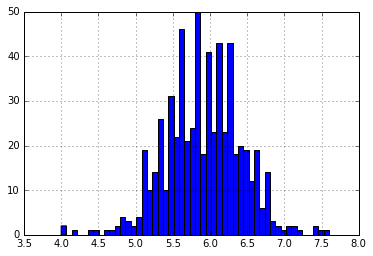

In [37]:
# 绘图!

#import numpy as np
#import matplotlib.pyplot as plt
#plt.plot(np.arange(10))

# 使用pandas简单绘图
df.sata.hist(bins=50)
